In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import statistics
import numpy as np
from sklearn.model_selection import train_test_split

## Data understanding


In [7]:
set1_df = pd.read_csv('set9_it1.csv')
set2_df = pd.read_csv('set9_it2.csv')

In [8]:
# Checking for missing values
print(set1_df.isna().sum())
print(set2_df.isna().sum())


DI                  0
TradeValue          0
RealmType           0
Enclave             0
LivingQuarters    117
ParcelSize          0
ParcelSizeUnit      0
dtype: int64
DI                     0
StructuralIntegrity    0
ExteriorCharm          0
dtype: int64


Visually checking data of string fields to detect typos or duplication

In [10]:
print(set1_df[['ParcelSizeUnit']].squeeze().unique())
print(set2_df[['ExteriorCharm']].squeeze().unique())
print(set1_df[['RealmType']].squeeze().unique())
print(sorted(set1_df[['Enclave']].squeeze().unique()))

['sqft' 'sqm']
['Common' 'Gleaming' 'Enchanting' 'Modest']
['Meadowlands' 'GnomeBurough' 'ArcaneMarket' 'AetherIsles'
 'CitadelQuarter']
['BRIGHTFORGE', 'Brightforge', 'Cloudrest', 'Crystalhollow', 'Dragonspire', 'Dragonspires', 'Dreamweaver', 'Duskwood', 'EMBERFALL', 'Emberfall', 'Glimmerwood', 'MYSTVALE', 'Moonglade', 'Mossheart', 'Mystvale', 'Nighthaven', 'Oakenshade', 'Petalbridge', 'Ravenstone', 'Riverbend', 'SHADOWMERE', 'Shadowmere', 'Silverglen', 'Starfall', 'Stormhold', 'Stormwatch', 'Sunspire', 'Sunspires', 'THORNFIELD', 'Thornfield', 'Verdantia', 'Windwhisper', 'Wolfsbane', 'Wyverncliff', 'dragonspire', 'emberfall', 'glimmerwood', 'shadowmere', 'silverglen', 'thornfield', 'wyverncliff']


Finding min and max values for numeric rows

In [12]:
minTraveValue = str(set1_df['TradeValue'].min())
maxTradeValue = str(set1_df['TradeValue'].max())

minLivingQuarters = str(set1_df['LivingQuarters'].min())
maxLivingQuarters = str(set1_df['LivingQuarters'].max())

minParcelSize = str(set1_df['ParcelSize'].min())
maxParcelSize = str(set1_df['ParcelSize'].max())

minStructuralIntegrity = str(set2_df['StructuralIntegrity'].min())
maxStructuralIntegrity = str(set2_df['StructuralIntegrity'].max())

print(f"""
Trade Value: {minTraveValue} - {maxTradeValue}
Living Quarters: {minLivingQuarters} - {maxLivingQuarters}
Parcel Size: {minParcelSize} - {maxParcelSize}
Structural Integrity: {minStructuralIntegrity} - {maxStructuralIntegrity}
""")



Trade Value: 113.5 - 755000.0
Living Quarters: 256.0 - 4339.0
Parcel Size: -26400.0 - 164660.0
Structural Integrity: 1 - 9



In [13]:
meanTradeValue = set1_df["TradeValue"].mean()
medianTradeValue = set1_df["TradeValue"].median()
modeTradeValue = set1_df["TradeValue"].mode().squeeze()

meanLivingQuarters = set1_df["LivingQuarters"].mean()
medianLivingQuarters = set1_df["LivingQuarters"].median()
modeLivingQuarters = set1_df["LivingQuarters"].mode().squeeze()

meanParcelSize = set1_df["ParcelSize"].mean()
medianParcelSize = set1_df["ParcelSize"].median()
modeParcelSize = set1_df["ParcelSize"].mode().squeeze()

modeRealmType = set1_df["RealmType"].mode().squeeze()
modeEnclave = set1_df["Enclave"].mode().squeeze()

meanStructuralIntegrity = set2_df["StructuralIntegrity"].mean()
medianStructuralIntegrity = set2_df["StructuralIntegrity"].median()
modeStructuralIntegrity = set2_df["StructuralIntegrity"].mode().squeeze()

modeExteriorCharm = set2_df["ExteriorCharm"].mode().squeeze()

print(f"""
Mean Values:
Trade Value: {meanTradeValue}
Living Quarters: {meanLivingQuarters}
Parcel Size: {meanParcelSize}
Structural Integrity: {meanStructuralIntegrity}

Median Values:
Trade Value: {medianTradeValue}
Living Quarters: {medianLivingQuarters}
Parcel Size: {medianParcelSize}
Structural Integrity: {medianStructuralIntegrity}

Mode for Numerics:
Trade Value: {modeTradeValue}
Living Quarters: {modeLivingQuarters}
Parcel Size: {modeParcelSize}
Structural Integrity: {modeStructuralIntegrity}

Mode for Strings:
Realm Type: {modeRealmType}
Enclave: {modeEnclave}
Exterior Charm: {modeExteriorCharm}
""")


Mean Values:
Trade Value: 180984.51166356326
Living Quarters: 1152.9367764915405
Parcel Size: 9820.034496129496
Structural Integrity: 5.561574269995768

Median Values:
Trade Value: 160000.0
Living Quarters: 1110.0
Parcel Size: 9320.0
Structural Integrity: 5.0

Mode for Numerics:
Trade Value: 135000.0
Living Quarters: 664.0
Parcel Size: 0    7200.0
1    9600.0
Name: ParcelSize, dtype: float64
Structural Integrity: 5

Mode for Strings:
Realm Type: Meadowlands
Enclave: Dragonspire
Exterior Charm: Common



# Data Preperation


In [15]:
# deleteing the rows with missing values 
set1_df.dropna(inplace=True)
# removes the duplicate rows in place
set1_df.drop_duplicates(inplace=True)
set2_df.drop_duplicates(inplace=True)

# Removing parcelSize below one
set1_df.drop(set1_df[set1_df['ParcelSize'] < 1].index, inplace=True)

# Cleaning capitalisation 
set1_df['Enclave'] = set1_df['Enclave'].str.capitalize()

# Replacing typos after manual inspection
set1_df['Enclave'] = set1_df['Enclave'].replace('Sunspires', 'Sunspire')
set1_df['Enclave'] = set1_df['Enclave'].replace('Dragonspires', 'dragonspire')

# Converting incosintent metrics
SQFT_TO_SQM = 0.092903

set1_df.loc[set1_df["ParcelSizeUnit"] == "sqft", "ParcelSize"] *= SQFT_TO_SQM
set1_df.loc[set1_df["ParcelSizeUnit"] == "sqft", "ParcelSizeUnit"] = "sqm"

## Merging


In [17]:
# Merging cleaned datasets on DI collumn
df = set1_df.merge(set2_df, left_on='DI', right_on='DI')

## Data Correlation
`Note: we are omitting ParcelSize here since Iteration 1 showed no correlation between it and TradeValue`

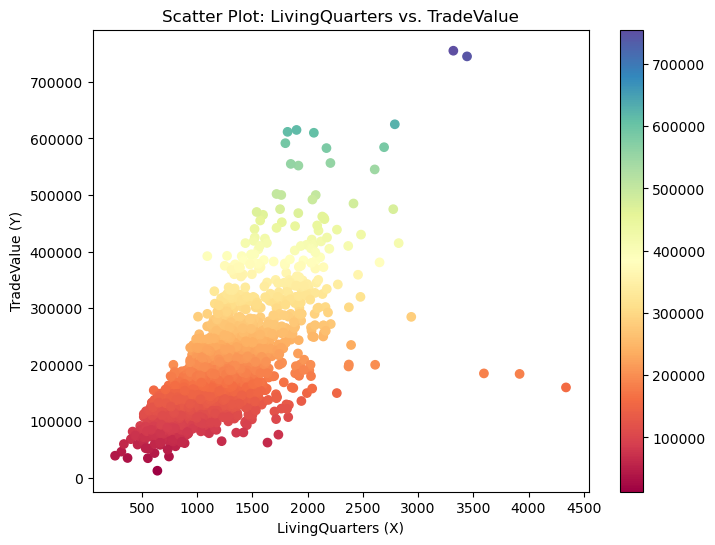

In [19]:
rcParams['figure.figsize'] = 8,6
plt.scatter(df["LivingQuarters"], df["TradeValue"], c=df["TradeValue"], cmap='Spectral')

plt.xlabel("LivingQuarters (X)")
plt.ylabel("TradeValue (Y)")
plt.title("Scatter Plot: LivingQuarters vs. TradeValue")
plt.colorbar()
plt.show()

#### TODO: Visualize this better  (1)

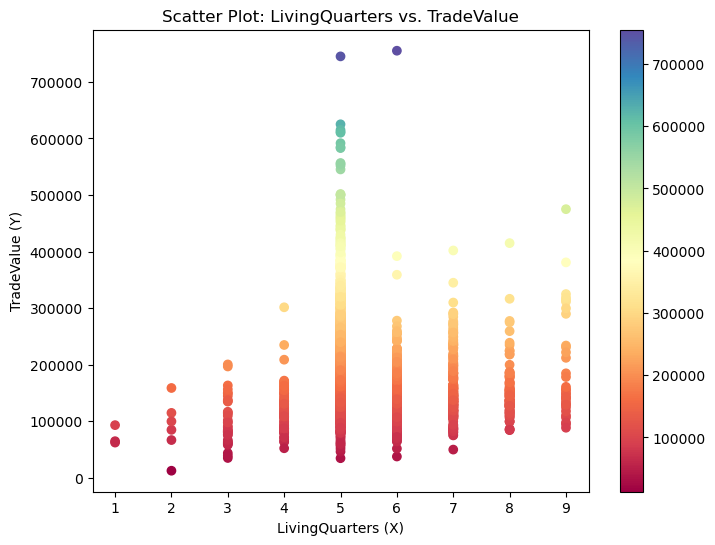

In [21]:
rcParams['figure.figsize'] = 8,6
plt.scatter(df["StructuralIntegrity"], df["TradeValue"], c=df["TradeValue"], cmap='Spectral')

plt.xlabel("LivingQuarters (X)")
plt.ylabel("TradeValue (Y)")
plt.title("Scatter Plot: LivingQuarters vs. TradeValue")
plt.colorbar()
plt.show()


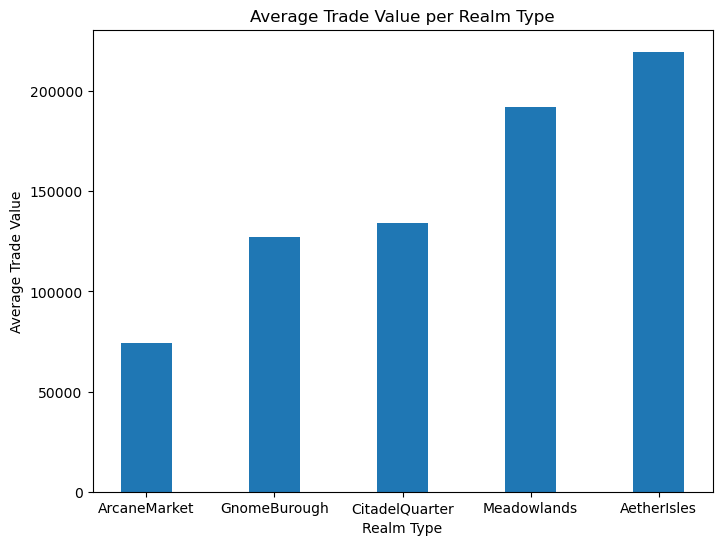

In [22]:
# Compute the average TradeValue per RealmType
avgTradeValuePerRealm = df.groupby('RealmType')['TradeValue'].mean().sort_values()

# Plot the bar chart
plt.bar(avgTradeValuePerRealm.index, avgTradeValuePerRealm.values,width=0.4)

# Labels and title
plt.xlabel("Realm Type")
plt.ylabel("Average Trade Value")
plt.title("Average Trade Value per Realm Type")
plt.show()

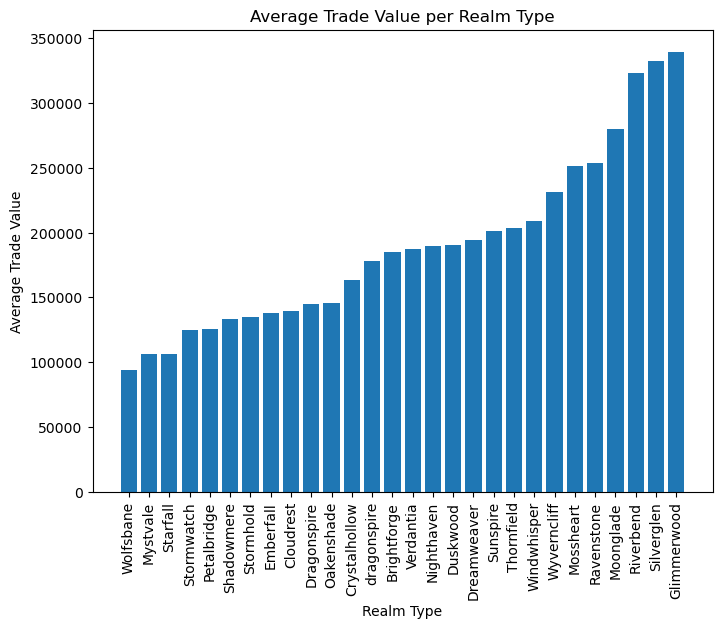

In [23]:
# Compute the average TradeValue per Enclave
avgTradeValuePerEnclave = df.groupby('Enclave')['TradeValue'].mean().sort_values()

# Plot the bar chart
plt.bar(avgTradeValuePerEnclave.index, avgTradeValuePerEnclave.values)

# Labels and title
plt.xlabel("Realm Type")
plt.ylabel("Average Trade Value")
plt.title("Average Trade Value per Realm Type")
plt.xticks(rotation='vertical')
plt.show()


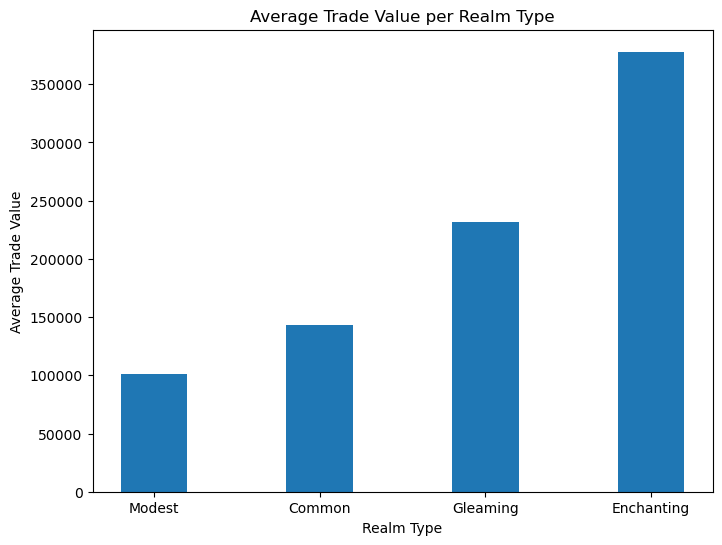

In [24]:
# Compute the average TradeValue per ExteriorCharm
avgTradeValuePerCharm = df.groupby('ExteriorCharm')['TradeValue'].mean().sort_values()

# Plot the bar chart
plt.bar(avgTradeValuePerCharm.index, avgTradeValuePerCharm.values,width=0.4)

# Labels and title
plt.xlabel("Realm Type")
plt.ylabel("Average Trade Value")
plt.title("Average Trade Value per Realm Type")
plt.show()


## Modeling

TradeValue: 100000.0, Monthly Payment: 381.9322363723631, Threshold: 750.0
TradeValue: 190000.0, Monthly Payment: 725.6712491074899, Threshold: 750.0
TradeValue: 203000.0, Monthly Payment: 775.322439835897, Threshold: 750.0
TradeValue: 146500.0, Monthly Payment: 559.530726285512, Threshold: 750.0
TradeValue: 212300.0, Monthly Payment: 810.8421378185267, Threshold: 750.0
TradeValue: 140000.0, Monthly Payment: 534.7051309213083, Threshold: 750.0
TradeValue: 91000.0, Monthly Payment: 347.55833509885036, Threshold: 750.0
TradeValue: 81300.0, Monthly Payment: 310.51090817073117, Threshold: 750.0
TradeValue: 468000.0, Monthly Payment: 1787.442866222659, Threshold: 750.0
TradeValue: 236000.0, Monthly Payment: 901.3600778387768, Threshold: 750.0
TradeValue: 147000.0, Monthly Payment: 561.4403874673737, Threshold: 750.0
TradeValue: 405000.0, Monthly Payment: 1546.8255573080703, Threshold: 750.0
TradeValue: 35311.0, Monthly Payment: 134.86409198544513, Threshold: 750.0
TradeValue: 201000.0, Mont

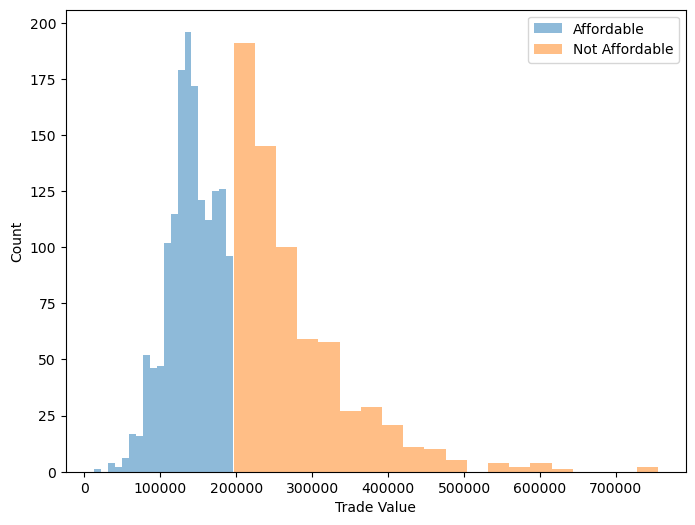

In [37]:
# Copy the data to assign them calculated affordibility
test_set = df.copy()

# Calculate the Affortibility for test_set
INCOME = 30000

INTEREST_RATE_PER_MONTH = 0.04 / 12

LOAN_TERM_YEARS = 30  # 
LOAN_TERM_MONTHS = LOAN_TERM_YEARS * 12

DOWNPAYMENT_MODIFIER = 0.2

# TODO : (3)Rayan Correct my math ^^ have fun this should give both false and true values
# source : https://learn.hz.nl/course/view.php?id=29674#section-33
test_set['AffordableDwelling'] = (((test_set['TradeValue'] * (1-DOWNPAYMENT_MODIFIER) ) * INTEREST_RATE_PER_MONTH * (1 + INTEREST_RATE_PER_MONTH) ** (LOAN_TERM * 12)) / ((1+INTEREST_RATE_PER_MONTH) ** (LOAN_TERM*30) -1)) >= INCOME

test_set['AffordableDwelling'].squeeze().unique()



# TODO: (2) + (1,3 if you have troubles) Create a simple If statement based model give the previous findings that would assign either 1 or 0 to the AffortableDwelling
# Source: https://learn.hz.nl/pluginfile.php/817914/mod_resource/content/2/w5c1-publish.pdf   
AFFORDABILITY_THRESHOLD = (INCOME / 12) * 0.3

def is_affordable(trade_value):
    if np.isnan(trade_value) or trade_value <= 0:
        return 0  # Invalid or missing trade value

    loan_amount = trade_value * (1 - DOWNPAYMENT_MODIFIER)

    # Compute monthly mortgage payment
    monthly_payment = loan_amount * (INTEREST_RATE_PER_MONTH * (1 + INTEREST_RATE_PER_MONTH) ** LOAN_TERM_MONTHS) / \
                      ((1 + INTEREST_RATE_PER_MONTH) ** LOAN_TERM_MONTHS - 1)

    print(f"TradeValue: {trade_value}, Monthly Payment: {monthly_payment}, Threshold: {AFFORDABILITY_THRESHOLD}")  # Debugging

    return 1 if monthly_payment <= AFFORDABILITY_THRESHOLD else 0

# Apply function to dataset
test_set["AffordableDwelling"] = test_set["TradeValue"].apply(is_affordable)

# Check results
print(test_set["AffordableDwelling"].value_counts())  # Check how many 0s and 1s

plt.hist(test_set["TradeValue"][test_set["AffordableDwelling"] == 1], bins=20, alpha=0.5, label="Affordable")
plt.hist(test_set["TradeValue"][test_set["AffordableDwelling"] == 0], bins=20, alpha=0.5, label="Not Affordable")
plt.xlabel("Trade Value")
plt.ylabel("Count")
plt.legend()
plt.show()

# TODO: (3) Confusion Matrix 
# Source: https://learn.hz.nl/pluginfile.php/817914/mod_resource/content/2/w5c1-publish.pdf
